In [1]:
from typing import Tuple, List, Any, Optional, Dict
from copy import deepcopy
from tqdm import tqdm

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.display import HTML

from matk.utils.animation import animate_frames
from matk.reinforcment import Labirint, Walker, QLearning, ValueItteration
%matplotlib inline

In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /

# Value Iteration

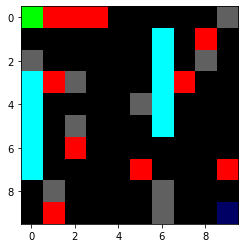

In [9]:
value_iter = ValueItteration(
    Labirint,
    {
        "size":10,
        "n_rocks":10,
        "n_volcanos":10,
        "n_escalators":2,
        "escalator_len":5,
        "main_step_prob":0.9
    },
    epsilon=0.005,
    gamma=0.9
)

value_iter.environment.v_print()

In [10]:
value_iter.run_algorithm()

Converged in 15 iterations


In [ ]:
all_actions, vi_stats = value_iter.run_policy()
print("Finished" if vi_stats["success"] else "Not Finished")
ani = animate_frames(all_actions, figsize=(10,10), interval=200)
HTML(ani.to_jshtml())

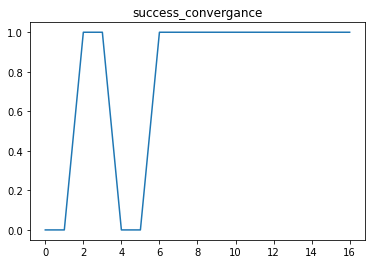

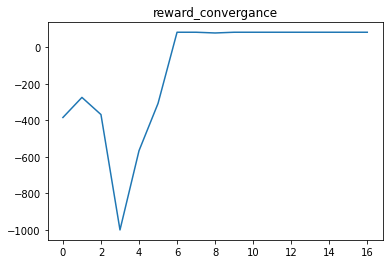

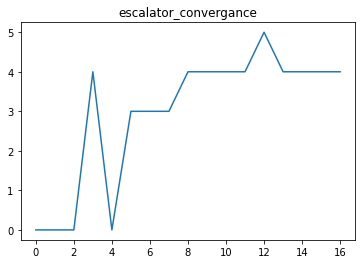

In [11]:
success_convergance = [value_iter.run_policy(input_policy=p, verbose=False)[1]['success'] for p in value_iter.hashed_policies]
plt.title("success_convergance")
plt.plot(success_convergance)
plt.show()

reward_convergance = [value_iter.run_policy(input_policy=p, verbose=False)[1]['reward'] for p in value_iter.hashed_policies]
plt.title("reward_convergance")
plt.plot(reward_convergance)
plt.show()

escalator_convergance = [value_iter.run_policy(input_policy=p, verbose=False)[1]['n_escalators_steps'] for p in value_iter.hashed_policies]
plt.title("escalator_convergance")
plt.plot(escalator_convergance)
plt.show()

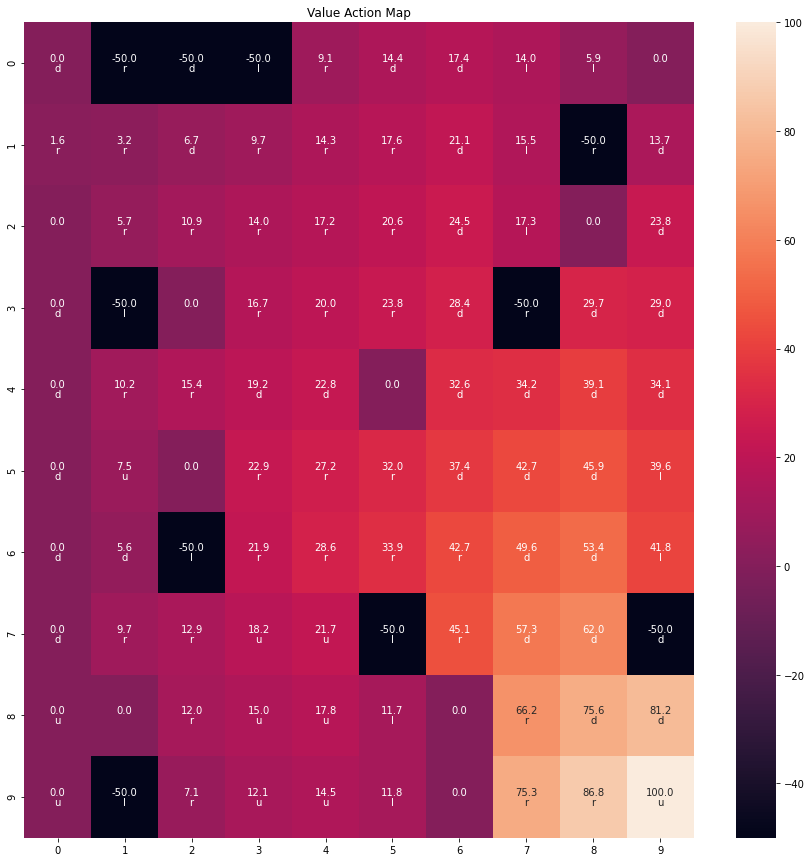

In [12]:
plt.figure(figsize=(15,15))
plt.title("Value Action Map")
sns.heatmap(value_iter.value_maps["value"], annot=False)
sns.heatmap(value_iter.value_maps["value"], annot=value_iter.value_maps["value"], annot_kws={'va':'bottom'}, fmt='.1f', cbar=False)
sns.heatmap(value_iter.value_maps["value"], annot=value_iter.value_maps["action"], annot_kws={'va':'top'}, fmt='', cbar=False)
plt.show()

# Q Learning

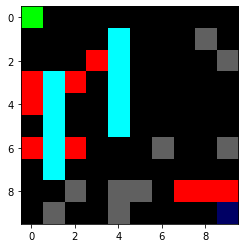

In [2]:
q_learn = QLearning(
    Labirint,
    {
        "size":10,
        "n_rocks":10,
        "n_volcanos":10,
        "n_escalators":2,
        "escalator_len":5,
        "main_step_prob":0.9
    },
    epsilon=1.0,
    gamma=0.9,
    lr=1.0,
    lr_shed=0.99,
    epsilon_shed=0.99
)

q_learn.environment.v_print()

In [3]:
ql_stats = q_learn.run_algorithm(n_steps=1000)

100%|██████████| 1000/1000 [00:01<00:00, 663.40it/s]


End game
Finished


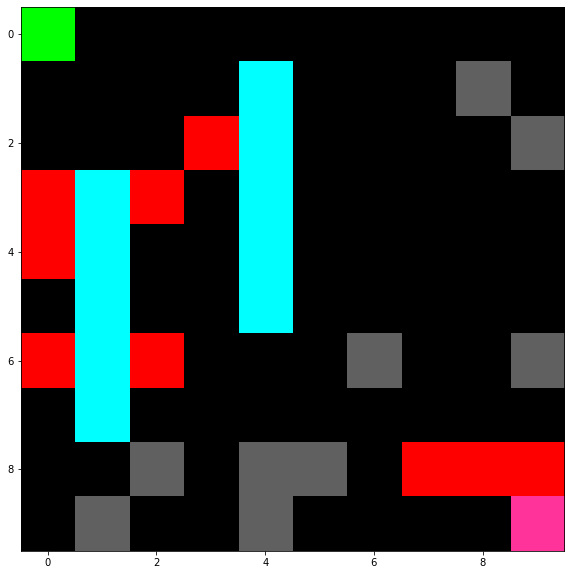

In [4]:
all_actions, ql_local_stats = q_learn.run_policy()
print("Finished" if ql_local_stats["success"] else "Not Finished")
ani = animate_frames(all_actions, figsize=(10,10), interval=200)
HTML(ani.to_jshtml())

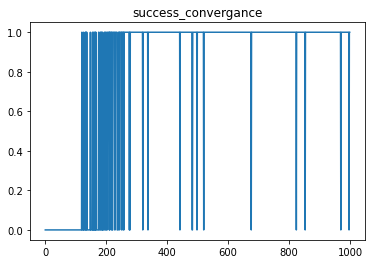

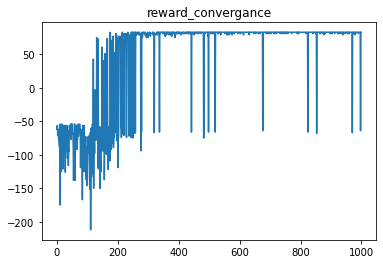

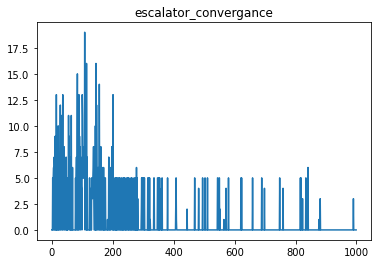

In [5]:
success_convergance = [el['success'] for el in ql_stats]
plt.title("success_convergance")
plt.plot(success_convergance)
plt.show()

reward_convergance = [el['reward'] for el in ql_stats]
plt.title("reward_convergance")
plt.plot(reward_convergance)
plt.show()

escalator_convergance = [el['n_escalators_steps'] for el in ql_stats]
plt.title("escalator_convergance")
plt.plot(escalator_convergance)
plt.show()

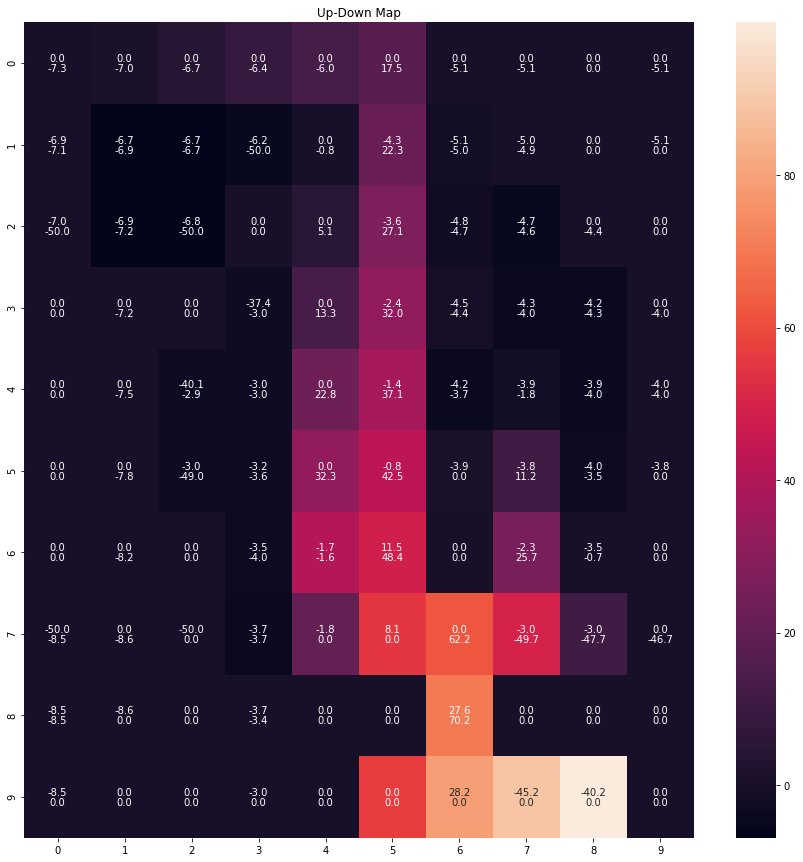

In [6]:
plt.figure(figsize=(15,15))
plt.title("Up-Down Map")
sns.heatmap(q_learn.q_maps["max"], annot=False)
sns.heatmap(q_learn.q_maps["max"], annot=q_learn.q_maps["up"], annot_kws={'va':'bottom'}, fmt='.1f', cbar=False)
sns.heatmap(q_learn.q_maps["max"], annot=q_learn.q_maps["down"], annot_kws={'va':'top'}, fmt='.1f', cbar=False)
plt.show()

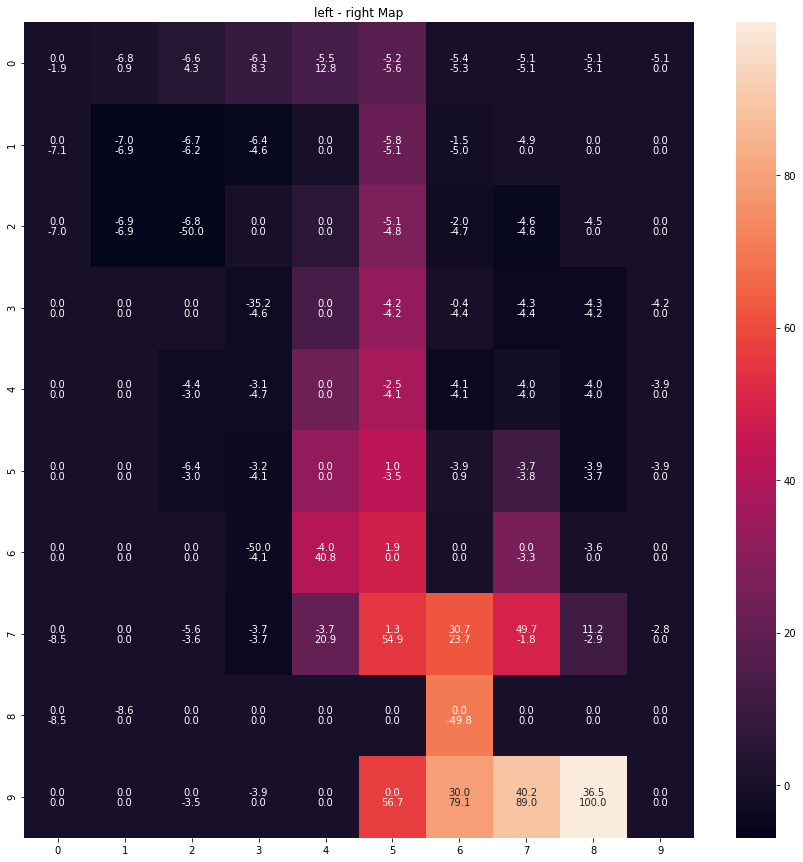

In [7]:
plt.figure(figsize=(15,15))
plt.title("left - right Map")
sns.heatmap(q_learn.q_maps["max"], annot=False)
sns.heatmap(q_learn.q_maps["max"], annot=q_learn.q_maps["left"], annot_kws={'va':'bottom'}, fmt='.1f', cbar=False)
sns.heatmap(q_learn.q_maps["max"], annot=q_learn.q_maps["right"], annot_kws={'va':'top'}, fmt='.1f', cbar=False)
plt.show()

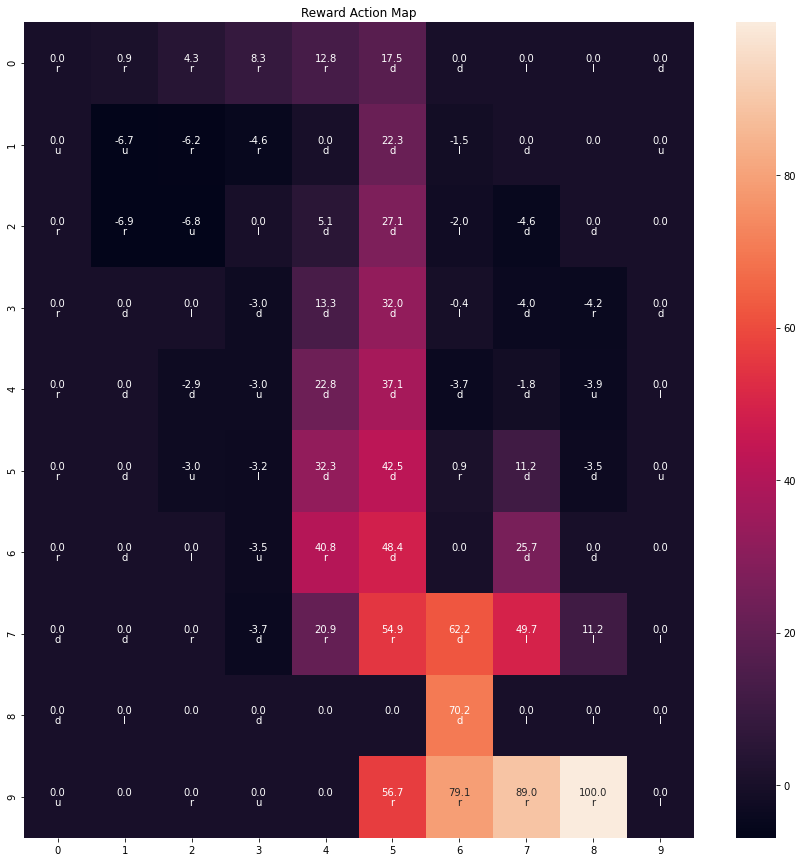

In [8]:
plt.figure(figsize=(15,15))
plt.title("Reward Action Map")
sns.heatmap(q_learn.q_maps["max"], annot=False)
sns.heatmap(q_learn.q_maps["max"], annot=q_learn.q_maps["max"], annot_kws={'va':'bottom'}, fmt='.1f', cbar=False)
sns.heatmap(q_learn.q_maps["max"], annot=q_learn.q_maps["action"], annot_kws={'va':'top'}, fmt='', cbar=False)
plt.show()